This documment summarized the analysis of the New York City Subway Dataset. It was also a part of final project submission for Project 2 of the "Introduction for Data Science", Udacity Data Analyst Nanodegree Program.

Table of content

## Analyzing the New York City Subway Dataset

### Load the data

In [2]:
import os
os.getcwd()

'/Users/thuy/Documents/Data-Science'

In [3]:
ls

Analyzing the NYC Subway Dataset-Copy1.ipynb  hr_by_team_year_sf_la.csv
Analyzing the NYC Subway Dataset.ipynb        hr_year.csv
P2_Wrangling_Subway_Data/                     lesson01.ipynb
Problem set 3.ipynb                           lesson3_Data_analysis.ipynb
Project4_all_functions.ipynb                  lesson4_visualization.ipynb
README.md                                     loading_wrangling_data_lesson02.ipynb
baseball_stats.csv                            turnstile_data_master_with_weather (1).csv


###Summary of the data

In [4]:
import pandas as pd
#Read the data as Dataframe
turnstile_weather = pd.read_csv("turnstile_data_master_with_weather (1).csv")

#Number of variables
print 'Total variables:', len(list(turnstile_weather.columns.values))

#list of variables
print 'List of variables: ', list(turnstile_weather.columns.values)

#Statistics summary of the data
print 'Statistics summary'
turnstile_weather.describe()

Total variables: 22
List of variables:  ['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder']
Statistics summary


,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
count,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951.000000,131951
mean,65975.000000,10.896158,1095.348478,886.890838,30.031894,57.241302,48.259013,29.892714,52.703526,29.965077,0.167100,0.334245,5.543065,56.169775,64.269729,71.769968,0.172276,0
std,38091.117022,6.892084,2337.015421,2008.604886,0.125689,8.770891,11.305312,0.146384,9.943590,0.130461,0.373066,0.471728,1.982441,6.338875,6.568289,7.627218,0.429005,0
min,0.000000,0.000000,0.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0
25%,32987.500000,5.000000,39.000000,32.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0
50%,65975.000000,12.000000,279.000000,232.000000,30.030000,57.000000,51.000000,29.910000,54.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,71.000000,0.000000,0
75%,98962.500000,17.000000,1109.000000,847.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0


###Section 0. References

1. http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

###Section 1. Statistical Test

####1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

I used two- tail Mann-Whitney U test to analyze the NYC subway data with the following hypotheses:

Null hypothesis Ho: The distribution of the number of entries is the same for rainny and non-rainy days. 
Alternative hypothesis Ha: The distribution of the number of entries is statistically different for rainny and non-rainy days.

####1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

Before I perform a statistical test, it is useful to take a look at the data and determine what distribution the data follows. Specifically, the hourly entries in the NYC subway data.

Weather has a significant impact on what kinds of transportation you want to go. Rain was one of the most important weather factor. Therefore, I wanted to know the difference in ridership of the NYC subway on the days with rain and without rain. 


In [5]:
#Summary of ridership on rainy days
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].describe()

count    44104.000000
mean      1105.446377
std       2370.527674
min          0.000000
25%         41.000000
50%        282.000000
75%       1103.250000
max      51839.000000
Name: ENTRIESn_hourly, dtype: float64

In [6]:
#Summary of ridership on no rainy days
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].describe()

count    87847.000000
mean      1090.278780
std       2320.004938
min          0.000000
25%         38.000000
50%        278.000000
75%       1111.000000
max      43199.000000
Name: ENTRIESn_hourly, dtype: float64

From the above statistic, we could see that both data had similar means and standard deviations.

##### Distribution of NYC subway ridership on the days with rain and without rain

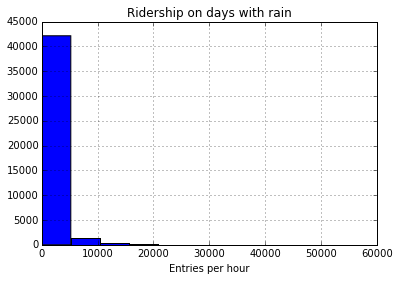

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Rain
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].hist()
plt.title('Ridership on days with rain')
plt.xlabel('Entries per hour')

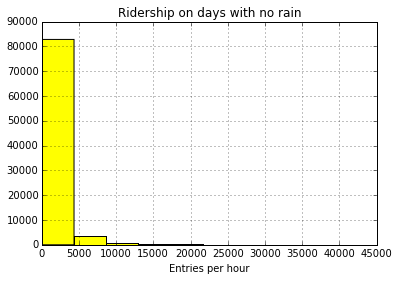

In [8]:
# No rain
turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].hist(color = "yellow")
plt.title('Ridership on days with no rain')
plt.xlabel('Entries per hour')

Both of the data have similar shapes and were not normally distributed.

The statistically summary and distribution results showed that both data had similar mean and standard deviation and were not normally distributed. Therefore, T-test was not an option. Since we had two groups of data and number of the data were more than 20, we could use Mann Whitney U-test to compare their distributions. We used two-tail test since we did not have any data supporting which group had larger mean.

####1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

#####Mann Whitney U-test

In [9]:
import numpy as np
import scipy
import scipy.stats
import pandas

# Consume turnstile_weather dataframe
# Return mean of entries with rain, mean of enteries without rain
# Return Mann_Whitney U-statistic and p value 

def mann_whitney_plus_means(turnstile_weather):
    with_rain_mean = turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].mean()
    without_rain_mean = turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'].mean()
    U,p = scipy.stats.mannwhitneyu(turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'], turnstile_weather[turnstile_weather["rain"] ==0]['ENTRIESn_hourly'])
    print 'P value =', p*2 # the mannwhitenyu returned one-tail p value
    print 'Mean on rainy days =', with_rain_mean
    print 'Mean on nonrainy days=', without_rain_mean
    return with_rain_mean, without_rain_mean, U, p

In [10]:
mann_whitney_plus_means(turnstile_weather)

P value = 0.049999825587
Mean on rainy days = 1105.44637675
Mean on nonrainy days= 1090.27878015


(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

####1.4 What is the significance and interpretation of these results?

P value is less than/almost equal to 0.05. Therefore, we could reject the null hypothesis and conclude that the distribution of the number of entries is statistically different for rainny and non-rainy days.


In [ ]:
# ridership by hour
turnstile_weather[turnstile_weather["rain"] ==1]['ENTRIESn_hourly'].hist()
plt.title('Ridership on days with rain')
plt.xlabel('Entries per hour')

###Section 2. Linear Regression

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels or Scikit Learn
Gradient descent using Scikit Learn
Or something different?


I used both OLS using Statsmodels and Scikit Learn Gradient descent using Sciket Learn.

####2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

I used original 'rain', 'precipi', 'Hour' and 'meantempi' variables and adding 'DAY' (day of week) variable as my input. 

The 'UNIT', 'Hour' and 'DAY' were important variable but 'UNIT' was a caterogies data and 'DAY' and 'Hour' are scaling data. Therefore, I used them as dummy variables as part of my features. 



In [11]:
input_variables = ['rain', 'precipi', 'Hour', 'meantempi', 'DAY'] 

####2.3 Why did you select these features in your model? 

I selected the features because weather, time and date had great impact on what how people would like to transport. Therefore, variables such as thunder, rain, precipitation, temperature, foggy condition, time of the day and day of week are important factors. 

In order to validate my assumption, I included and withdrawed the variables in my features and investigated how it increased or decreased my coefficients of determination (R2) value. The results showed that using rain, precipitation, temperature, time of the day and day of week get the best R2 value of 0.43.




In [12]:
#thunder data
turnstile_weather['thunder'].describe()

count    131951
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           0
Name: thunder, dtype: float64

There was no thunder during the recording period.

In [14]:
# Add day of the week DAY variable to the dataframe
import datetime as dt
turnstile_weather['DAY'] = pandas.Series(turnstile_weather['DATEn'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday()), index=turnstile_weather.index)
turnstile_weather.is_copy = False

In [15]:
#
turnstile_weather['DAY'].describe()

count    131951.000000
mean          2.983820
std           2.080339
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: DAY, dtype: float64

####2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

In [16]:
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    
    
    clf = SGDRegressor() # select iteration = 20 to improve R2
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params[:5]

In [18]:
turnstile_weather['UNIT'].describe()

count     131951
unique       465
top         R549
freq       12198
Name: UNIT, dtype: object

In [19]:


def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    clf = SGDRegressor(n_iter = 20) # select iteration = 20 to improve R2
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params

def predictions(dataframe):
    
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi', 'DAY']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    print len(params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions


In [20]:
predictions(turnstile_weather)


470


array([ 1776.52187418,  2059.03992385,  2341.55797352, ...,  1077.84324355,
        1077.84324355,  1077.84324355])

In [21]:
def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    
    difference_squared = map(lambda data, predictions: (data - predictions)**2, data, predictions)
    mean_data = np.mean(data)
    variance = map(lambda data: (data - mean_data)**2, data)
    r_squared = 1 - sum(difference_squared)/sum(variance)
    print r_squared

In [22]:
data = turnstile_weather['ENTRIESn_hourly']
compute_r_squared(data, predictions(turnstile_weather))

470
0.417348237002


### Model improvement

Background information about the NYC subway system:

- Although the subway operates 24 hours a day, not all station entrances are accessible at all times or have full-time agents. We need to check which station has no entrances at what time

In [23]:


def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    clf = SGDRegressor(n_iter = 20) # select iteration = 20 to improve R2
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params

def predictions_day(dataframe):
    
    features = dataframe[['rain', 'precipi', 'meantempi', 'maxtempi']]
    dummy_days = pandas.get_dummies(dataframe['DAY'], prefix='day')
    dummy_units =pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    dummy_hours = pandas.get_dummies(dataframe['Hour'], prefix='hour')
    days_units= pandas.concat([dummy_days, dummy_units, dummy_hours], axis=1)
    
            
    features = features.join(days_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    print len(params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions


In [26]:
compute_r_squared(turnstile_weather['ENTRIESn_hourly'], predictions_day(turnstile_weather))

500
0.462977833092


In [27]:
#The subway closed on weekend?
from ggplot import *
%matplotlib inline
ridership_none = turnstile_weather[turnstile_weather['ENTRIESn_hourly'] ==0][['Hour' , 'DAY', 'UNIT']]
ridership_none.head()
ridership_none['UNIT'].describe()


count     13341
unique      465
top        R549
freq       5720
Name: UNIT, dtype: object

In [28]:
ridership_none[ridership_none['UNIT']=="R549"].describe()

,Hour,DAY
count,5720.000000,5720.000000
mean,10.896329,3.092657
std,7.307182,2.130097
min,0.000000,0.000000
25%,4.000000,1.000000
50%,10.000000,3.000000
75%,18.000000,5.000000
max,23.000000,6.000000


In [29]:
ridership_none[ridership_none['UNIT']=="R001"].describe()

,Hour,DAY
count,3.000000,3.000000
mean,10.666667,3.000000
std,8.504901,2.645751
min,1.000000,1.000000
25%,7.500000,1.500000
50%,14.000000,2.000000
75%,15.500000,4.000000
max,17.000000,6.000000


In [30]:
ridership_none[ridership_none['UNIT']=="R002"].describe()

,Hour,DAY
count,20.000000,20.000000
mean,12.400000,4.600000
std,6.394076,2.392972
min,1.000000,0.000000
25%,8.000000,5.000000
50%,13.000000,6.000000
75%,17.000000,6.000000
max,21.000000,6.000000


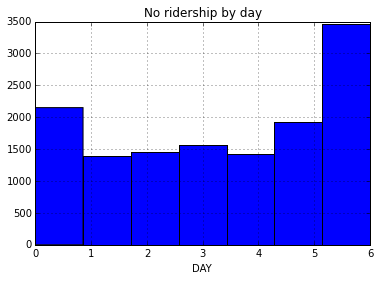

In [68]:
%matplotlib inline
from pandas import *
from ggplot import *
# no ridership by DAY
ridership_none['DAY'].hist(bins = 7)
plt.title('No ridership by day')
plt.xlabel('DAY')

We can see there was less ridership on weekend

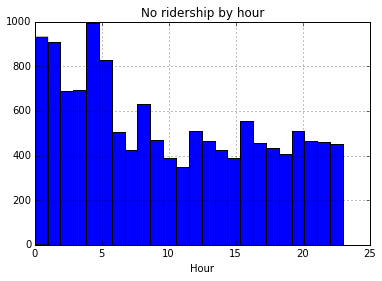

In [53]:
# no ridership by Hour
ridership_none['Hour'].hist(bins = 24)
plt.title('No ridership by hour')
plt.xlabel('Hour')



We can see that the midnight 0 to 6pm has less ridership than other hours.

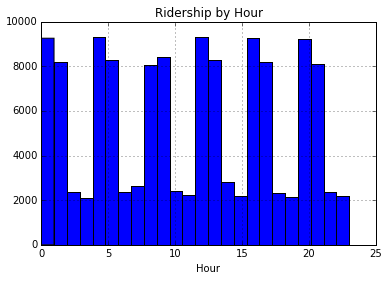

In [59]:
# ridership by Hour
turnstile_weather[['Hour','ENTRIESn_hourly']]['Hour'].hist(bins = 24)
plt.title('Ridership by Hour')
plt.xlabel('Hour')

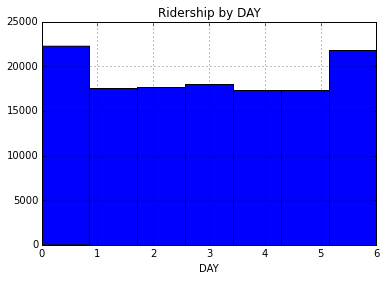

In [67]:
# ridership by DAY
turnstile_weather[['DAY','ENTRIESn_hourly']]['DAY'].hist(bins = 7)
plt.title('Ridership by DAY')
plt.xlabel('DAY')

Weekend has impact on ridership. 

In [86]:
weekday_data = turnstile_weather[(turnstile_weather.DAY <= 5) & (turnstile_weather.DAY >=1)]
weekday_data['DAY'].describe()

count    87910.000000
mean         2.990832
std          1.409761
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: DAY, dtype: float64

In [121]:
compute_r_squared(weekday_data['ENTRIESn_hourly'], predictions_day(weekday_data))

498
0.503840374223


In [133]:


def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    clf = SGDRegressor(n_iter = 20) # select iteration = 20 to improve R2
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params

def predictions_day_4(dataframe):
    
    features = dataframe[['rain', 'meantempi', 'maxtempi', 'meandewpti','fog']]
    dummy_days = pandas.get_dummies(dataframe['DAY'], prefix='day')
    dummy_units =pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    dummy_hours = pandas.get_dummies(dataframe['Hour'], prefix='hour')
    days_units= pandas.concat([dummy_days, dummy_units, dummy_hours], axis=1)
    
            
    features = features.join(days_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    print len(params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions


In [134]:
compute_r_squared(weekday_data['ENTRIESn_hourly'], predictions_day_4(weekday_data))

499
0.478495798613


Yes! It is getting better

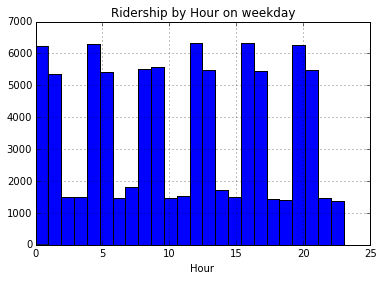

In [73]:
weekday_data[['Hour','ENTRIESn_hourly']]['Hour'].hist(bins = 24)
plt.title('Ridership by Hour on weekday')
plt.xlabel('Hour')

In [79]:
weekend_data = turnstile_weather[(turnstile_weather.DAY == 6) | (turnstile_weather.DAY ==1)]

In [80]:
compute_r_squared(weekend_data['ENTRIESn_hourly'], predictions_day(weekend_data))

495
0.439746111151


### Further improvement: deleting zero entries

In [90]:
has_ridership = turnstile_weather[turnstile_weather['ENTRIESn_hourly'] >0]
has_ridership.describe()

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder,DAY
count,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610.000000,118610,118610.000000
mean,66102.780870,11.007866,1218.550940,975.217385,30.029762,57.318152,48.305387,29.890128,52.761774,29.962843,0.168907,0.336354,5.556226,56.183998,64.276781,71.772464,0.174006,0,2.940410
std,37806.878024,6.847148,2434.302829,2098.703829,0.123588,8.706655,11.288948,0.143987,9.908866,0.127943,0.374671,0.472464,1.999489,6.330412,6.566575,7.627105,0.431919,0,2.061611
min,1.000000,0.000000,1.000000,0.000000,29.740000,39.000000,22.000000,29.540000,31.000000,29.640000,0.000000,0.000000,1.000000,46.000000,55.000000,58.000000,0.000000,0,0.000000
25%,33289.250000,5.000000,83.000000,53.000000,29.960000,50.000000,38.000000,29.840000,45.000000,29.910000,0.000000,0.000000,5.000000,52.000000,60.000000,65.000000,0.000000,0,1.000000
50%,66290.500000,12.000000,382.000000,290.000000,30.030000,59.000000,52.000000,29.900000,55.000000,29.960000,0.000000,0.000000,5.000000,54.000000,63.000000,72.000000,0.000000,0,3.000000
75%,98943.750000,17.000000,1275.000000,954.000000,30.100000,64.000000,55.000000,29.970000,60.000000,30.050000,0.000000,1.000000,6.000000,60.000000,68.000000,78.000000,0.100000,0,5.000000
max,131950.000000,23.000000,51839.000000,45249.000000,30.310000,70.000000,66.000000,30.230000,68.000000,30.270000,1.000000,1.000000,12.000000,70.000000,78.000000,86.000000,2.180000,0,6.000000


In [88]:
weekday_with_ridership = has_ridership[(has_ridership.DAY <= 5) & (has_ridership.DAY >=1)]

In [89]:
compute_r_squared(weekday_with_ridership['ENTRIESn_hourly'], predictions_day(weekday_with_ridership))

497
-1.55480477504e+14


In [115]:


def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    clf = SGDRegressor(n_iter = 20) # select iteration = 20 to improve R2
    intercept = clf.fit(features,values).intercept_
    params = clf.fit(features,values).coef_
    return intercept, params

def predictions_day1(dataframe):
    
    features = dataframe[['rain', 'meandewpti', 'fog']]
    dummy_days = pandas.get_dummies(dataframe['DAY'], prefix='day')
    dummy_units =pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    dummy_hours = pandas.get_dummies(dataframe['Hour'], prefix='hour')
    days_units= pandas.concat([dummy_days, dummy_units, dummy_hours], axis=1)
    
            
    features = features.join(days_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    print len(params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions


In [117]:
compute_r_squared(weekday_data['ENTRIESn_hourly'], predictions_day1(weekday_data))

497
0.465701231585
